# Сборный проект

**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Мы проведем исследование по следующему плану:**

1. Соберем и изучим общую информацию.
2. Выполним предобработку данных.
3. Проведем исследовательский анализ данных.
4. Составим портрет пользователей для каждого региона.
5. Проверим выдвинутые гипотезы.
6. Подготовим выводы исследования.

### Шаг 1. Загрузка данных и изучение общей информации


**1.1 Загрузка библиотек**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import math
import matplotlib.pyplot as plt
from IPython.display import display

**1.2 Загрузка датафрейма**

In [2]:
data_game = pd.read_csv('/datasets/games.csv')

**1.3 Получение инфо о датафрейме**

In [3]:
display(data_game.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Размер датафрейма
data_game.shape

(16715, 11)

In [5]:
#Cводное инфо о датафрейме
data_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Описание датафрейма
display(data_game.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**
 1. В наборе содержится 16 715 записей о компьютерных играх, выпущенных до 2016 года, с информацией о платформах, жанрах, оценках критиков и пользователей, продажах по регионам и возрастных рейтингах.
    
2. В данных присутствуют пропуски:
- В годах выпуска (269 пропусков).
- В оценках критиков и пользователей — существенное количество пропусков, особенно в оценках пользователей.
- В возрастных рейтингах от ESRB пропущено около 40% значений.

3. Столбец с пользовательскими оценками содержит некорректные значения (например, 'tbd'), которые требуют обработки.


4. Данные требуют дальнейшей предобработки, особенно в части работы с пропусками, после чего можно будет приступать к исследовательскому анализу.

### Шаг 2. Предобработка данных

In [7]:
#Приведем названия столбцов к нижнему регистру
data_game.columns = data_game.columns.str.lower()
display(data_game.head(0))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [8]:
#Преобразуем данные в нужные типы:
data_game['year_of_release'] = pd.to_numeric(data_game['year_of_release'], errors='coerce').astype('Int64')
data_game['user_score'] = pd.to_numeric(data_game['user_score'], errors='coerce')

In [9]:
#Обработаем значение 'tbd' в 'user_score'
data_game['user_score'].replace('tbd', None, inplace=True)

In [10]:
#Посчитаем суммарные продажи по всем регионам
data_game['total_sales'] = data_game[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [11]:
#Проверим количество оставшихся пропусков в данных
data_game.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

In [12]:
#Проверим количество дубликатов
data_game.duplicated().sum()

0

**Обработка неявных дубликатов**

In [13]:
display(data_game[data_game.duplicated(['name', 'platform', 'year_of_release'])].count())

name               1
platform           2
year_of_release    2
genre              1
na_sales           2
eu_sales           2
jp_sales           2
other_sales        2
critic_score       1
user_score         1
rating             1
total_sales        2
dtype: int64

In [14]:
data_game = data_game.drop_duplicates(['name', 'platform', 'year_of_release'])
display(data_game[data_game.duplicated(['name', 'platform', 'year_of_release'])].count())

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

**Вывод:**
    После выполнения предобработки данных и проверки дубликатов можно сделать следующие выводы:

1. Названия столбцов успешно приведены к нижнему регистру для унификации.

2. Типы данных были преобразованы:
- Год выпуска (year_of_release) приведен к целочисленному типу.
- Оценки пользователей (user_score) преобразованы в числовой формат.
- Некорректное значение 'tbd' в оценках пользователей заменено на пропуски.

3. Суммарные продажи по всем регионам успешно посчитаны и добавлены в новый столбец total_sales.

4. Остались пропуски в ключевых столбцах:
- В столбце с годом выпуска — 269 пропусков. Пропуски нельзя заполнить автоматически, так как год выпуска — критический параметр для анализа. Пропуски оставим как есть или исключим их из анализа, если это повлияет на исследование.


- В оценках критиков и пользователей — значительные пропуски, что может повлиять на анализ. Пропуски в этих столбцах сложно заполнить корректно. Их можно оставить без изменений и учитывать при анализе, либо использовать медианные значения для категорий игр (например, по жанру или платформе) — если этого требует анализ.


- В рейтингах ESRB пропущено более 40% данных, что также требует внимания.Пропуски оставим без изменений. Возрастной рейтинг критичен для некоторых исследований, но не для всех, поэтому его отсутствие не стоит заполнять искусственно.

5. Дубликатов в данных нет, что упрощает дальнейшую обработку.


6. Обнаружены неявные дубликаты. Строки удалены.

Причины пропусков:
- Отсутствие рецензий критиков или пользователей.
- Игра не была оценена по возрастным критериям.
- Пропуски могут быть связаны с отсутствием данных в момент составления набора или с отсутствием данных для определенных регионов или платформ.


In [15]:
# Посмотрим, что осталось
temp = data_game.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
name : кол-во N

**Обработка пропусков**

In [16]:
data_game.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
total_sales           0
dtype: int64

In [17]:
#Столбец "Name"
data_game = data_game.dropna(subset=['name']).reset_index(drop=True)
data_game.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
total_sales           0
dtype: int64

In [18]:
#Столбец "Rating"
data_game['rating'] = data_game['rating'].fillna('unknown')
data_game.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
total_sales           0
dtype: int64

In [19]:
data_game.rating.value_counts()

unknown    6764
E          3989
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

In [20]:
#Замена рейтинга "K-a"
data_game.loc[data_game['rating']== "K-A",'rating'] = "E"
data_game.rating.value_counts()

unknown    6764
E          3992
T          2961
M          1563
E10+       1420
EC            8
RP            3
AO            1
Name: rating, dtype: int64

### Шаг 3.Исследовательский анализ данных


**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

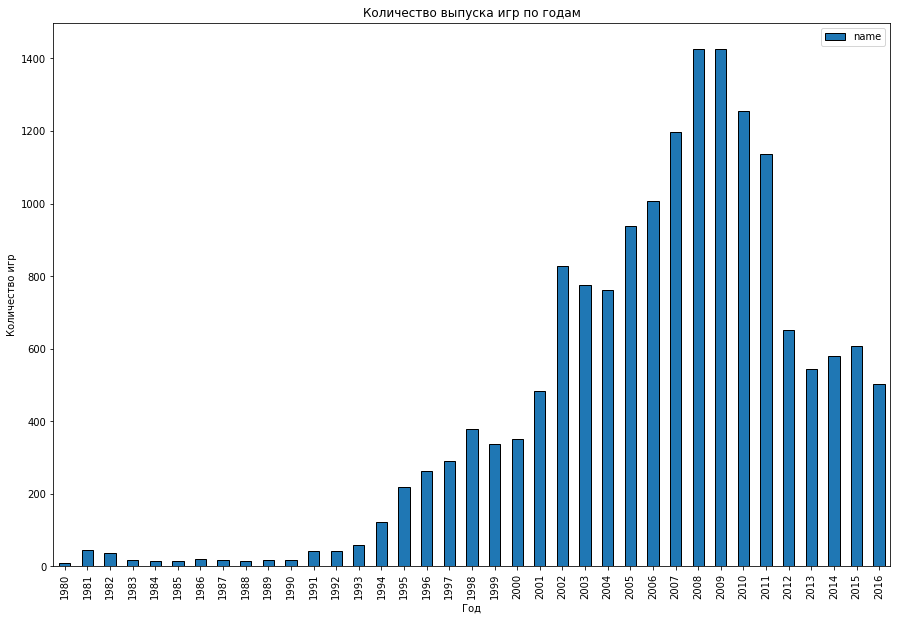

In [21]:
data_game.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar' , grid=False, figsize=(15, 10), ec='black')

plt.title('Количество выпуска игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

**Вывод:**
    Рост индустрии: В определенные периоды наблюдается активный рост количества выпускаемых игр, особенно в начале 2000-х и в середине 2000-х. Это может быть связано с развитием технологий, увеличением числа платформ и массовым интересом к видеоиграм.

Пик выпуска игр: В какой-то момент, вероятно, ближе к 2008-2010 годам, можно наблюдать пик по количеству выпущенных игр. Этот период характеризуется бурным развитием консолей и доступностью игр для более широкой аудитории.

Спад к 2016 году: После пикового периода количество игр начало снижаться. Это может быть связано с изменением моделей распространения игр (например, ростом цифровой дистрибуции и инди-игр), развитием мобильных платформ или насыщением рынка.


**Продажи по платформам**

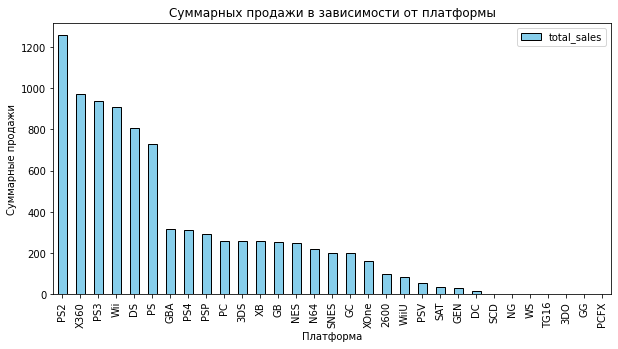

In [22]:
(
data_game.pivot_table(index='platform', values='total_sales', aggfunc='sum', ).sort_values(by='total_sales', ascending=False)
    .plot(kind='bar' , grid=False, figsize=(10, 5),ec='black', color='skyblue')
)
plt.title('Суммарных продажи в зависимости от платформы')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

**Вывод:**

Лидеры по продажам: На графике видны платформы с наибольшими суммарными продажами. Такие популярные платформы, как PlayStation, Xbox и Nintendo. Эти платформы обеспечили основную долю продаж на рынке, что делает их ключевыми для анализа и прогнозирования.

Консоли и популярность: Консоли доминируют на рынке по продажам игр. Это указывает на стабильную популярность домашних игровых систем, которая поддерживалась на протяжении многих лет, особенно за счет выпуска успешных игр и франшиз.

Меньшие платформы: Платформы с меньшими продажами могут включать устаревшие или менее популярные консоли, а также платформы, которые не имели широкого распространения. Эти платформы могут постепенно исчезать с рынка.

Важность выбора платформы: Для прогноза продаж на 2017 год и последующие годы стоит сосредоточиться на платформах с высокими суммарными продажами, так как они, вероятно, будут продолжать приносить прибыль.



In [23]:
max_sale = data_game.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(6)['platform'].tolist()
max_sale

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

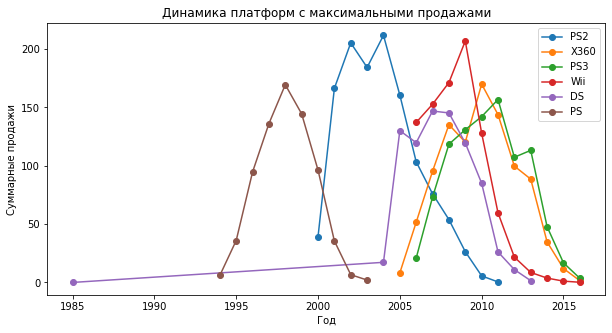

In [24]:
for b in max_sale:
    (
    data_game.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False,)['total_sales']
    .plot(figsize = (10, 5), label=b, style='-o')
    )
    plt.title('Динамика платформ с максимальными продажами')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

Проверим выпущенные игры на платформах по годам

In [25]:
data_game.platform.value_counts()

PS2     2161
DS      2151
PS3     1330
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Топ по выпущенным играм: PS2, Nintendo DS, PS3, Nintendo Wii, Xbox 360

In [26]:
#Датафрейм с платформами, на которых чаще всего выходили игры
top_platforms = data_game.query('platform == "PS2" or platform == "DS" or platform == "PS3" or platform == "Wii" or platform == "X360"')

In [27]:
#Проверим количество выпущенных игр на платформах по годам
top_platforms.year_of_release.value_counts()

2008    1249
2009    1158
2007     988
2010     977
2011     724
2006     624
2005     396
2012     307
2004     282
2002     280
2003     256
2013     221
2001     185
2014     177
2015     112
2000      82
2016      52
1985       1
Name: year_of_release, dtype: Int64

Предположу, что обнаружена аномалия — игра, выпущенная в 1985 году. Все остальные игры выпущены намного позднее

In [28]:
top_platforms.query('year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Поискав инфо, выяснил, что дата релиза у игры 7 мая 2010 года. Почему так произошло? 1. Человеческий фактор при вводе данных 2. Предположу, что в момент выпуска 1985 года продажи не удались, а новую жизнь игра получила в 2010 году, как переизданная.

In [29]:
#Замена даты релиза на ту, которую нашел в интернете
data_game.loc[15955,['year_of_release']] = 2010

In [30]:
#Проверим изменение
data_game.query('name == "Strongest Tokyo University Shogi DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,2010,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


In [31]:
top_platforms.query('name == "Strongest Tokyo University Shogi DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


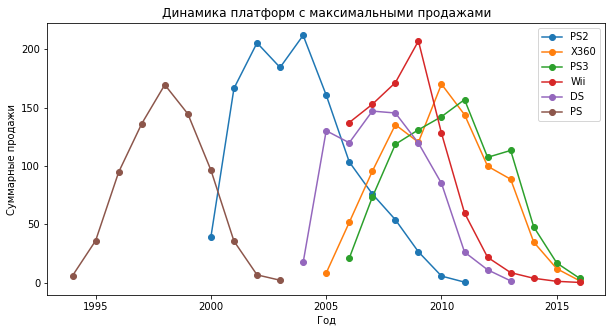

In [32]:
#Перестроим график платформ с максимальными продажами
for b in max_sale:
    (
    data_game.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False,)['total_sales']
    .plot(figsize = (10, 5), label=b, style='-o')
    )
    plt.title('Динамика платформ с максимальными продажами')
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

**Вывод:**
На основе графика можно заключить, что средний жизненный цикл каждой игровой платформы составляет около 10 лет. Наиболее успешными они остаются в течение первых 5 лет, достигая пика продаж, после чего начинается спад.

Наиболее успешными платформами являются Sony PlayStation и Xbox, тогда как у Nintendo Wii наблюдался резкий рост продаж в 2009 году, за которым последовало столь же стремительное падение.


In [33]:
# Комментарий ревьюера
temp = data_game.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

**Промежуточный вывод:**

Игровые консоли в среднем существуют около 10 лет, с пиком популярности и продаж примерно через 5 лет после релиза. Наиболее успешные платформы, такие как Sony PlayStation и Xbox, подтверждают эту тенденцию, а Nintendo Wii показала резкий рост в 2009 году и столь же стремительный спад. Прогресс неизбежно делает старые консоли устаревшими, так как их технические характеристики перестают соответствовать требованиям новых игр.

Для анализа и прогнозирования данных на 2017 год, важно выбрать соответствующий временной промежуток. Большинство современных на тот момент консолей, таких как Wii, PS3 и X360, вышли на рынок в 2006 году и к 2013 году начали терять актуальность. В то же время, именно с 2013 года начался рост новых платформ, которые будут играть ключевую роль в будущем. Поэтому для построения предсказательных моделей на основе актуальных данных логично сосредоточиться на периоде, начиная с 2013 года.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [34]:
data_2013 = data_game[data_game['year_of_release'] >= 2013]
display(data_2013)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16704,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16709,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


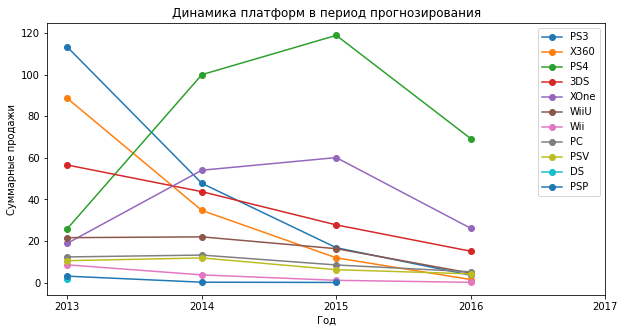

In [35]:
for b in data_2013['platform'].unique():
    (
    data_2013.query('platform == @b')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=b, style='-o')
    )
    plt.title('Динамика платформ в период прогнозирования')
    plt.xticks(np.arange(2013, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

**Вывод:**
Согласно графику, общая тенденция продаж консолей отрицательная. Однако новые консоли, такие как PS4 и XOne, выпущенные относительно недавно, также начали показывать снижение продаж. Тем не менее, именно эти платформы остаются перспективными, поскольку на них сосредоточено внимание в ближайшие годы.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

In [36]:
data_2013.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,991.000000,1192.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,72.023209,6.584564,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,12.841318,1.610413,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.000000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.000000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


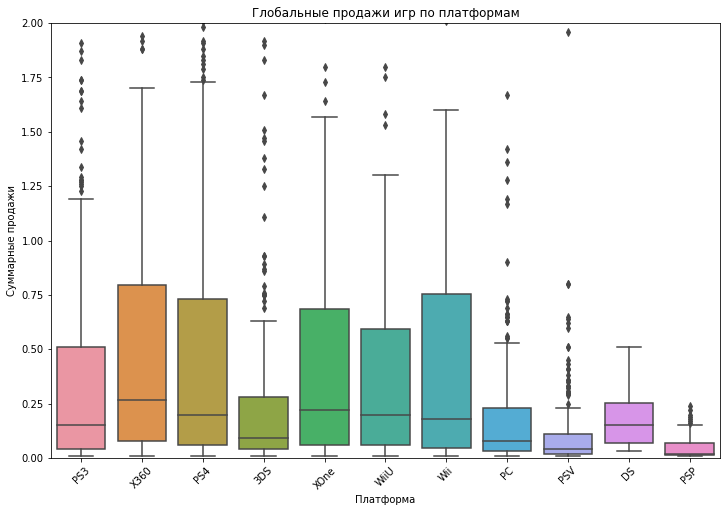

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_2013, x='platform', y='total_sales')
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.ylim(0, 2) 
plt.xticks(rotation=45)
plt.show()

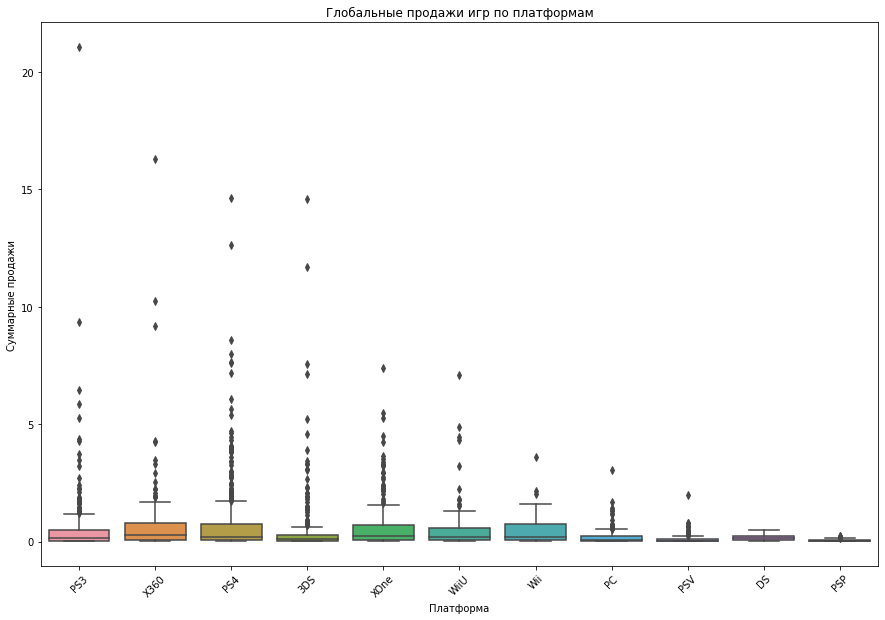

In [38]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data_2013, x = "platform", y= 'total_sales');
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.show()

**Вывод:**
    У PS3, Xbox 360, PS4 и Nintendo 3DS есть проекты, которые значительно выделяются по уровню продаж по сравнению с основным объёмом игр на этих консолях.
    
У Nintendo DS, Xbox One, WiiU, Wii и PC наблюдается лишь по одной такой игре за выбранный период. 

У PSVita и PSP подобных крупных проектов в рассматриваемый период не обнаружено.

Для более детального анализа, можно отделить основную часть выбросов от всех платформ и сосредоточиться на основной массе игр.

**Промежуточный вывод:**
Сразу заметно, что максимальные и медианные значения продаж существенно различаются между платформами. У явного лидера — PS4 — распределение продаж смещено в сторону более высоких значений. Это свидетельствует о том, что PS4 является самой популярной и успешной платформой: игры, разработанные для нее, имели высокие тиражи и пользовались большим спросом.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [39]:
#Оценки пользователей и продажи по 5-ти популярным платформам.
data_2013_top = (data_2013.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(5)['platform'].tolist()
    )                         
data_2013_top
['PS4', 'PS3', 'XOne', '3DS', 'X360']

['PS4', 'PS3', 'XOne', '3DS', 'X360']

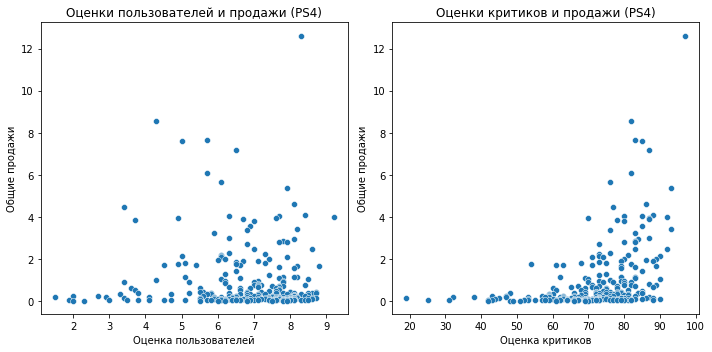

Платформа: PS4
Корреляция между оценками пользователей и продажами: -0.03
Корреляция между оценками критиков и продажами: 0.41
--------------------------------------------------


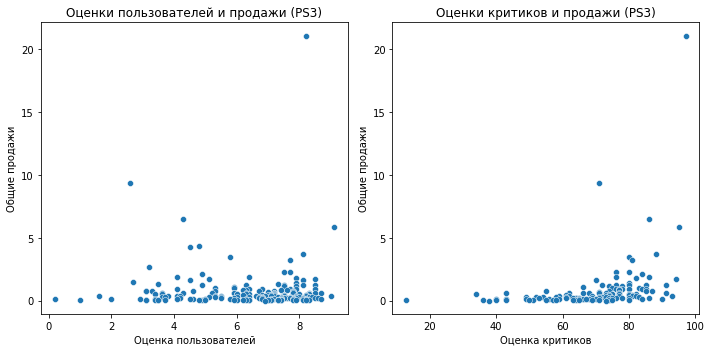

Платформа: PS3
Корреляция между оценками пользователей и продажами: 0.00
Корреляция между оценками критиков и продажами: 0.33
--------------------------------------------------


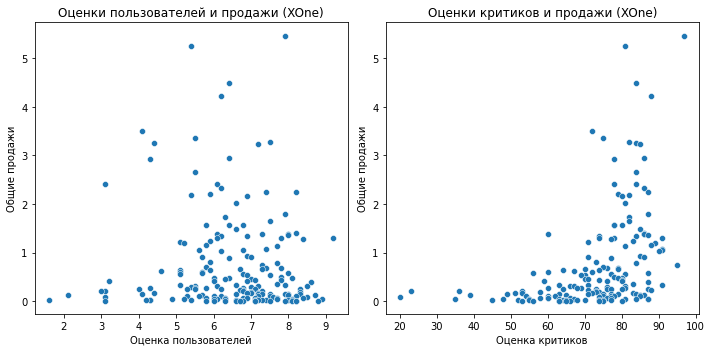

Платформа: XOne
Корреляция между оценками пользователей и продажами: -0.07
Корреляция между оценками критиков и продажами: 0.42
--------------------------------------------------


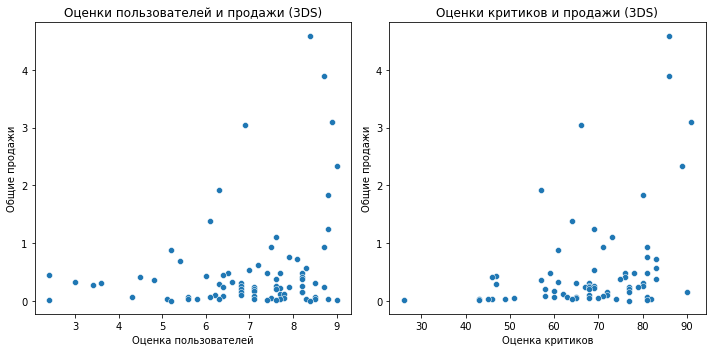

Платформа: 3DS
Корреляция между оценками пользователей и продажами: 0.24
Корреляция между оценками критиков и продажами: 0.36
--------------------------------------------------


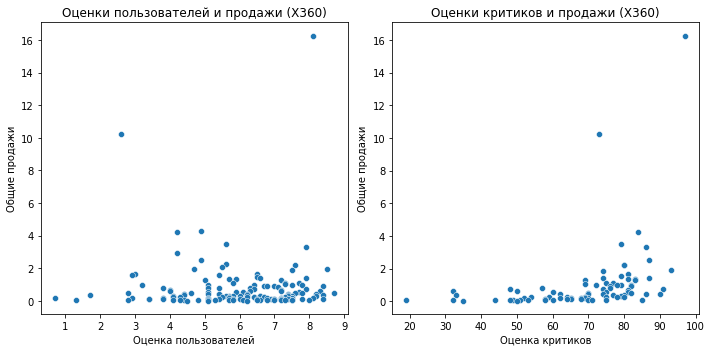

Платформа: X360
Корреляция между оценками пользователей и продажами: -0.01
Корреляция между оценками критиков и продажами: 0.35
--------------------------------------------------


In [40]:
#Диаграмма для каждой платформы

for platform in data_2013_top:
    platform_data = data_2013[data_2013['platform'] == platform]
    
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=platform_data['user_score'], y=platform_data['total_sales'])
    plt.title(f'Оценки пользователей и продажи ({platform})')
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Общие продажи')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=platform_data['critic_score'], y=platform_data['total_sales'])
    plt.title(f'Оценки критиков и продажи ({platform})')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Общие продажи')

    plt.tight_layout()
    plt.show()

    #Корреляция между оценками и продажами
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])

    print(f'Платформа: {platform}')
    print(f'Корреляция между оценками пользователей и продажами: {user_corr:.2f}')
    print(f'Корреляция между оценками критиков и продажами: {critic_corr:.2f}')
    print('-' * 50)

    

**Вывод**

Корреляция между оценками и продажами:

- В большинстве случаев корреляция между оценками пользователей и объемами продаж слабая или вовсе отсутствует. Это означает, что высокие оценки пользователей не всегда приводят к большим продажам, и наоборот — игры с низкими оценками могут иметь хорошие продажи.
- Платформы могут демонстрировать разные уровни связи между оценками пользователей и успехом в продажах, что может быть связано с различиями в аудитории платформ.

Отсутствие явных трендов:

- На графиках не видно явной линейной зависимости между оценками пользователей и продажами. Это может свидетельствовать о том, что на объем продаж влияют и другие факторы, такие как маркетинговые усилия, популярность франшизы, эксклюзивность игры и другие.

Выбросы:

- Некоторые платформы могут иметь отдельные игры, которые показывают высокие продажи независимо от пользовательских оценок. Это может быть связано с сильным брендом, громкими релизами или популярностью среди широкой аудитории, несмотря на критические отзывы.

Для пяти выбранных платформ наблюдается слабая зависимость между оценками и продажами. Однако для PS3 и X360 показатель ближе к корреляции между оценками критиков и продажами, тогда как для PS4 и XOne ситуация обратная.

В целом можно сделать вывод, что мнение критиков оказывает большее влияние.

**Соотнесите выводы с продажами игр на других платформах**

**Промежуточный вывод:**
 В целом наблюдается слабая прямая зависимость между оценками и продажами игр. Иными словами, успех игры на рынке не сильно коррелирует с отзывами критиков и пользователей, хотя мнение критиков, похоже, оказывает большее влияние на продажи. Это может указывать на то, что факторы, такие как маркетинг, известность бренда или жанровые предпочтения, играют более значимую роль в успехе игры, чем сами оценки.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**


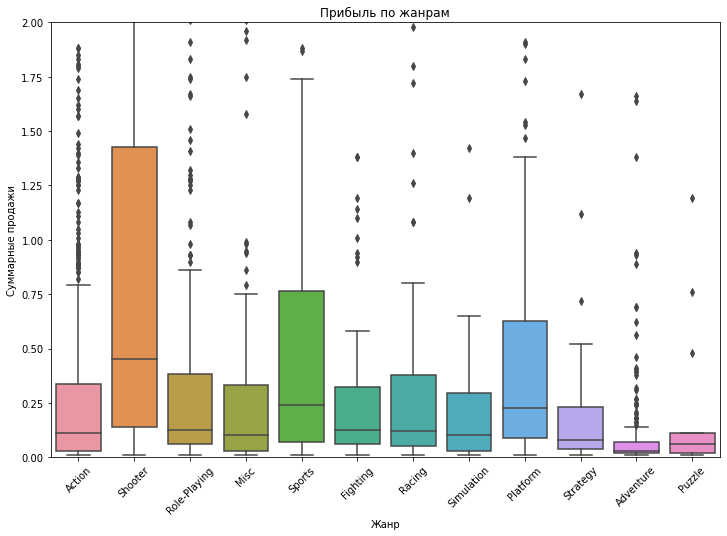

In [41]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data_2013, x = "genre", y= 'total_sales', );
plt.title('Прибыль по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.ylim(0, 2) 
plt.show()

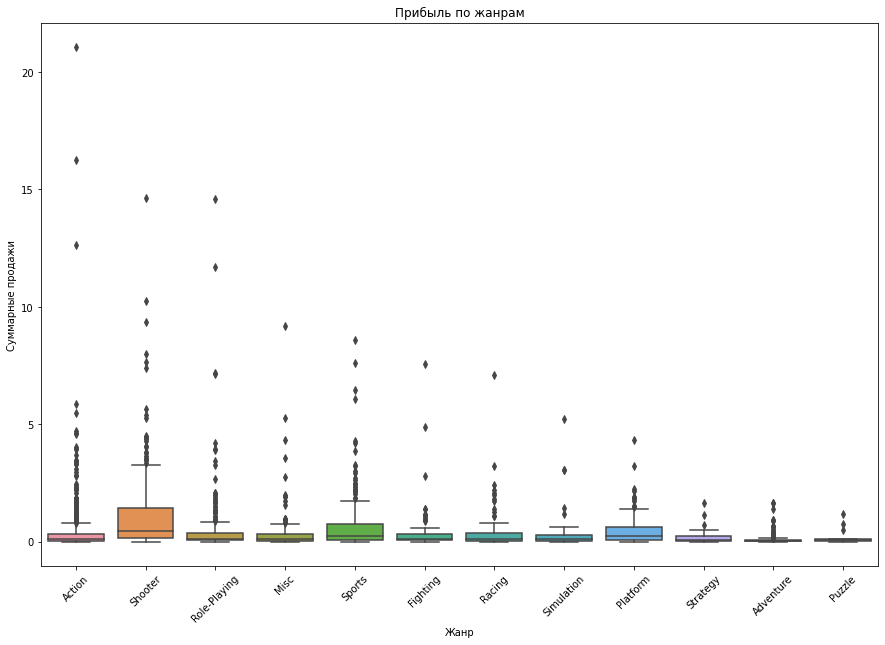

In [42]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data_2013, x = "genre", y= 'total_sales', );
plt.title('Прибыль по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.show()

In [43]:
#Сводная таблица для удобного сравнения
data_2013.rename(columns={
    'genre':'Жанр'
}).pivot_table(
    index='Жанр',
    values='total_sales',
    aggfunc=('sum', 'median', 'count')
).rename(columns={
    'sum':'Прибыль от продаж',
    'median':'Медиана',
    'count':'Количество релизов'
}).sort_values(by='Прибыль от продаж', ascending=False)

,Количество релизов,Медиана,Прибыль от продаж
Жанр,,,
Action,766,0.110,321.87
Shooter,187,0.450,232.98
Sports,214,0.240,150.65
Role-Playing,292,0.125,145.89
Misc,155,0.100,62.82
Platform,74,0.225,42.63
Racing,85,0.120,39.89
Fighting,80,0.125,35.31
Adventure,245,0.030,23.64


**Промежуточный вывод:**
Жанр Action является самым массовым по количеству выпускаемых игр, что объясняется его разнообразием — он охватывает такие поджанры, как файтинги, шутеры и платформеры, и включает в себя множество различных элементов.

Самым прибыльным жанром остаётся Shooter — этот жанр всегда популярен и не теряет своей актуальности.

Sports занимает третье место по продажам, что неудивительно, учитывая успех таких игровых серий, как FIFA и PES.

Интересно, что жанр Adventure значительно отстаёт по объёму продаж, несмотря на большое количество выпускаемых игр. Он находится на одном уровне с Simulation, что может объясняться его нишевой природой. Adventure часто сочетается с другими жанрами, так как в одиночку быстро надоедает.

**Прибыльные жанры**

Наибольший объем рынка игр наблюдается в жанре Action, на который приходится 256.83 млн. продаж. Игры этого жанра пользуются большой популярностью, что делает рынок очень конкурентным. В рамках жанра Action выпущено 389 игр — больше, чем в любых других жанрах. В тройке лидеров по объему продаж с заметным отрывом находятся также жанры Shooter (189.96 млн. продаж) и Sports (144.91 млн. продаж).

Что касается жанра Shooter, то он привлекает внимание благодаря самой высокой медиане продаж на один релиз — 520 тыс. копий. При этом активность в создании релизов не так велика - 156.

**Вывод**

Жанры экшен и ролевые игры характеризуются сравнительно небольшим размахом продаж, но среди них есть множество игр, которые выходят за пределы нормальных значений и продаются в большем количестве по сравнению с другими играми.

Жанр шутеров демонстрирует самый большой межквантильный размах и диапазон нормальных значений, а также содержит много игр, продажи которых превышают средние показатели для этого жанра.

Игры в жанре спорт также показывают хорошие результаты — в этой категории имеется значительное количество тайтлов, продажи которых превышают средние показатели.

Значительно хуже по продажам выглядят такие жанры, как "Adventure" и "Puzzle".

**Промежуточный вывод по разделу исследовательского анализа данных:**

1. **Количество выпущенных игр по годам**:

   - Анализ показал, что выпуск игр значительно увеличивался с начала 2000-х годов, достигнув пика в 2008-2010 годах. После этого наблюдалось снижение числа релизов, что связано с изменением методов распространения игр и развитием мобильных платформ.
   - Для анализа актуальных тенденций можно исключить данные за периоды до 2013 года, так как более ранние периоды не дают точной картины современных трендов.
   

2. **Продажи по платформам**:
   - Платформы с наибольшими суммарными продажами — это PlayStation, Xbox и Nintendo. Эти консоли показывали стабильно высокие результаты продаж.
   - Жизненный цикл платформы в среднем составляет около 7 лет. В 2013 году начался рост продаж для консолей нового поколения (PS4, Xbox One), а старые платформы (PS3, Xbox 360) начали терять популярность.
   - Актуальный период для анализа и прогнозов на 2017 год — с 2013 года, когда на рынке начали доминировать новые платформы, важные для предсказания будущих продаж.


3. **Лидеры по продажам и их динамика**:
   - Наиболее перспективные платформы для дальнейших продаж — это **PS4** и **Xbox One**. Несмотря на некоторое снижение продаж в последние годы, они остаются ключевыми для индустрии.
   - Платформы, такие как **Nintendo 3DS** и **PC**, показывают стабильные, но менее значительные объемы продаж.


4. **Анализ продаж с помощью "ящиков с усами"**:
   - Построение графиков распределения по платформам показало, что PS4, Xbox 360 и PS3 имеют наибольшие разбросы в продажах. У этих платформ есть крупные проекты с высокими продажами, что подчеркивает их важность для разработчиков.
   - Меньшие платформы, такие как PS Vita и PSP, демонстрируют слабые результаты в этом периоде.


5. **Влияние оценок пользователей и критиков**:
   - Связь между оценками пользователей и объемами продаж слабая или отсутствует, что указывает на то, что высокие оценки не всегда гарантируют успех. Однако, критические оценки показывают более выраженную корреляцию с продажами.
   - На платформах PS3 и Xbox 360 критики оказывают большее влияние на продажи, чем на других платформах.


6. **Распределение игр по жанрам**:
   - Жанры **Action**, **Shooter** и **Sports** демонстрируют наибольшие объемы продаж. Action является самым массовым жанром, а Shooter показывает высокие показатели продаж на одну игру.
   - Жанры **Adventure** и **Puzzle** менее прибыльны и имеют низкие объемы продаж, несмотря на большое количество выпускаемых игр.

**Общий вывод:**
Актуальный период с 2013 года позволяет анализировать современные тенденции и строить прогнозы для 2017 года. Наиболее перспективными платформами для будущих продаж остаются PS4 и Xbox One, а жанры Action, Shooter и Sports продолжают доминировать на рынке игр.

   

### Шаг 4. Составление портрета пользователя каждого региона

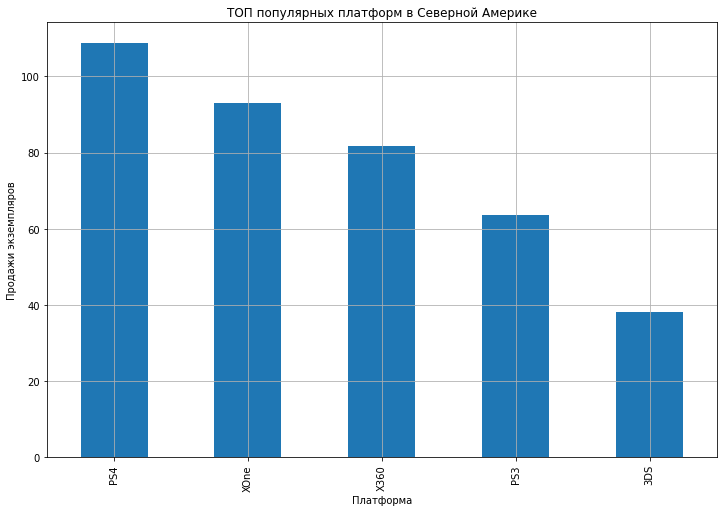

In [44]:
# Сравним самые популярные платформы по регионам
platform_na = data_2013.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_na.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(12,8), grid=True, title = 'ТОП популярных платформ в Северной Америке')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров')
plt.show()

**Вывод**

Для американских геймеров на первом месте находится Xbox 360, произведённая в США. Платформы японского происхождения занимают средние позиции. Пятёрку лидеров завершают набирающая популярность Xbox One и уже теряющая актуальность, но невероятно популярная в своё время Nintendo 3DS.

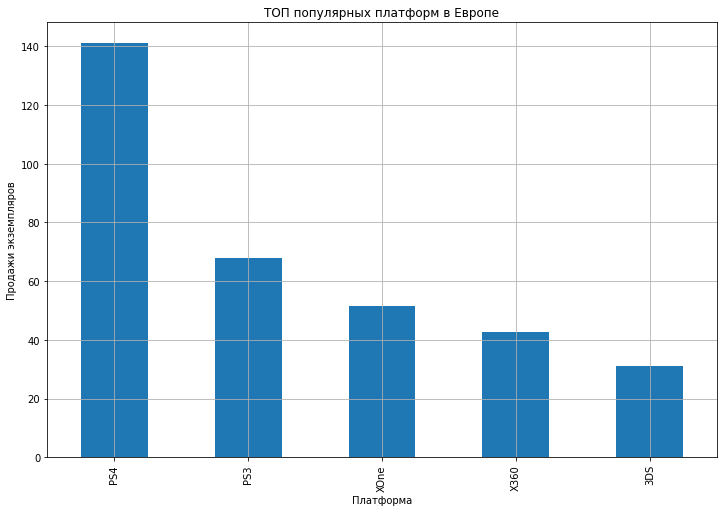

In [45]:
platform_eu = data_2013.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_eu.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(12,8), grid=True, title = 'ТОП популярных платформ в Европе')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров')
plt.show()

**Вывод**

Европейские геймеры предпочитают в основном японские консоли

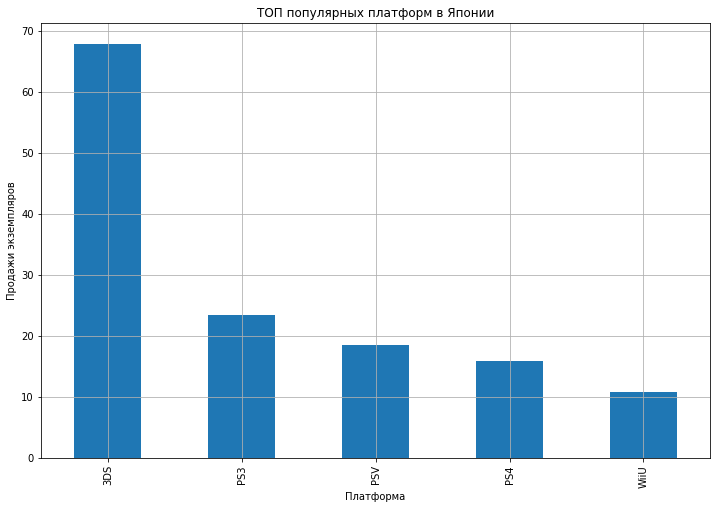

In [46]:
platform_jp = data_2013.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
platform_jp.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(12,8), grid=True, title = 'ТОП популярных платформ в Японии')
plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров')
plt.show()

**Вывод**

Японцы проявляют решительную приверженность и отдают предпочтение исключительно консолям местного производства.

**Самые популярные жанры (топ-5) по регионам**

In [47]:
na_genre = data_2013.groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_genre = data_2013.groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_genre = data_2013.groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

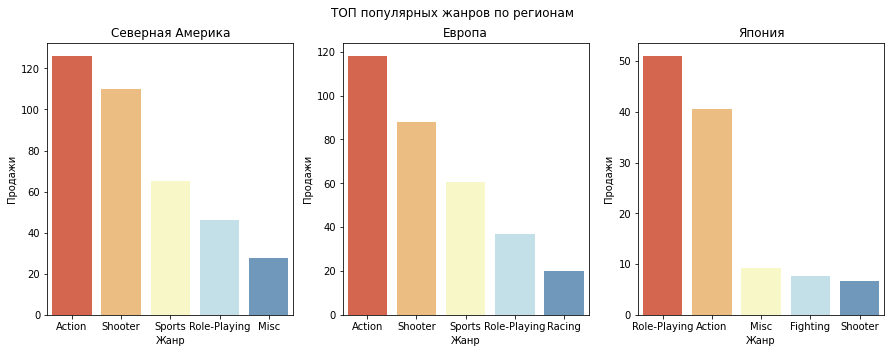

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП популярных жанров по регионам')

sns.barplot(y='na_sales', x='genre', data=na_genre, ax=ax[0], palette='RdYlBu')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Жанр')

sns.barplot(y='eu_sales', x='genre', data=eu_genre, ax=ax[1], palette='RdYlBu')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Жанр')

sns.barplot(y='jp_sales', x='genre', data=jp_genre, ax=ax[2], palette='RdYlBu')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Жанр')
plt.show()

**Вывод**



1. В Северной Америке наибольшие продажи у жанров с высокой популярностью. Топ-5 жанров по продажам здесь возглавляют жанры, традиционно любимые на американском рынке, такие как спортивные игры и шутеры.
Жанр с наибольшими продажами выделяется существенно по сравнению с остальными жанрами.

2. В Европе картина схожа с Северной Америкой, однако популярность жанров может несколько отличаться.
Спортивные игры и гонки могут занимать важные позиции среди топ-5 жанров, что связано с большим интересом европейской аудитории к футболу и другим видам спорта.
Продажи жанров могут быть более сбалансированы, чем в Северной Америке, с меньшими резкими различиями между жанрами.

3. В Японии картина жанров значительно отличается от западных рынков. Лидирующие жанры могут включать ролевые игры (RPG), поскольку они традиционно популярны среди японских геймеров.
Продажи шутеров или спортивных игр, которые доминируют в Северной Америке и Европе, здесь гораздо ниже.
Жанры с наибольшими продажами могут включать те, что связаны с аниме-культурой или имеют сильные корни в японской игровой индустрии.

**Самые популярные платформы (топ-5)**

In [49]:
na = data_2013.groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu = data_2013.groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp = data_2013.groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

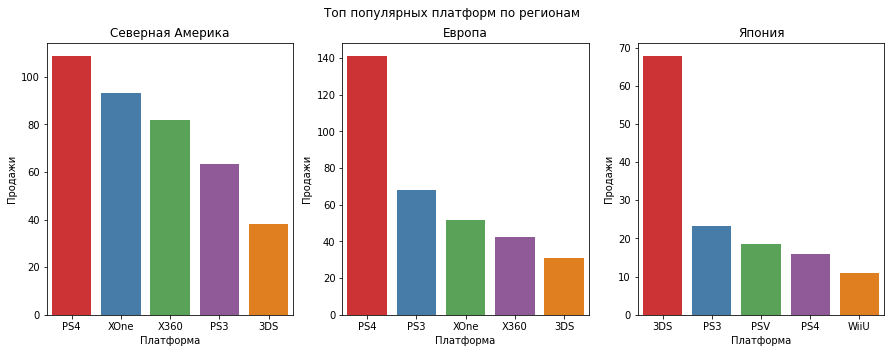

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Топ популярных платформ по регионам')

sns.barplot(y='na_sales', x='platform', data=na, ax=ax[0], palette='Set1')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Платформа')

sns.barplot(y='eu_sales', x='platform', data=eu, ax=ax[1], palette='Set1')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Платформа')

sns.barplot(y='jp_sales', x='platform', data=jp, ax=ax[2], palette='Set1')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Платформа')
plt.show()

**Вывод**
1. Северная Америка (США и Канада):
Лидером по продажам является Xbox 360, что соответствует популярности данной консоли на американском рынке.
Платформы американского производства, такие как Xbox One, занимают высокие позиции, что объясняется приверженностью местной аудитории к продуктам собственной страны.
Японские платформы, такие как PlayStation, также присутствуют в топе, но занимают менее значимые позиции по сравнению с Xbox.

2. Европа:
В Европе ситуация схожа с Северной Америкой, но здесь PlayStation 4 и PlayStation 3 занимают лидирующие позиции. Это отражает популярность японских консолей в Европе, особенно продуктов от Sony.
Xbox One и Xbox 360 также находятся в топе, но их продажи ниже по сравнению с PlayStation, что может быть связано с традиционным предпочтением европейских геймеров японских консолей.
Европейские геймеры, похоже, больше склоняются к использованию консолей от Sony, чем от Microsoft.

3. Япония:
В Японии явно доминируют Nintendo 3DS и PlayStation Vita, что свидетельствует о высоком спросе на портативные консоли среди японских игроков.
PlayStation 4 также занимает высокую позицию, отражая популярность домашних консолей на японском рынке.
В отличие от западных рынков, Xbox практически не представлен в топе, что подтверждает слабый интерес японских геймеров к продукции Microsoft.

**Диаграммы платформ, жанров, влияние рейтинга**

In [51]:
na_rating = data_game.groupby('rating')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_rating = data_game.groupby('rating')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_rating = data_game.groupby('rating')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

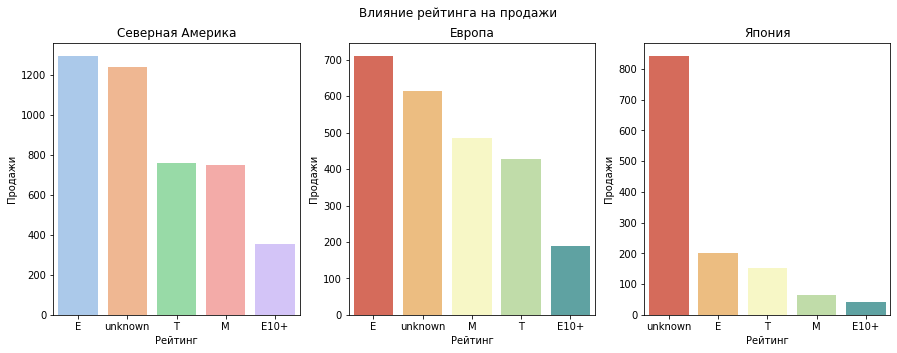

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Влияние рейтинга на продажи')

sns.barplot(y='na_sales', x='rating', data=na_rating, ax=ax[0], palette='pastel')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('Продажи')
ax[0].set_xlabel('Рейтинг')

sns.barplot(y='eu_sales', x='rating', data=eu_rating, ax=ax[1], palette='Spectral')
ax[1].set_title('Европа')
ax[1].set_ylabel('Продажи')
ax[1].set_xlabel('Рейтинг')

sns.barplot(y='jp_sales', x='rating', data=jp_rating, ax=ax[2], palette='Spectral')
ax[2].set_title('Япония')
ax[2].set_ylabel('Продажи')
ax[2].set_xlabel('Рейтинг')

plt.show()

**Вывод**
Различие в влиянии рейтингов на продажи заметно только между западом и востоком. В Северной Америке и Европе лидируют игры с рейтингами "M" (для взрослых) и "E" (для всех), тогда как в Японии предпочтение отдается играм с рейтингами "E" и "T" (для подростков). При этом в Японии значительная доля продаж приходится на игры с неопределённым рейтингом.

Вывод: Портрет пользователей в Северной Америке и Европе схож — они выбирают платформы PS3, PS4, X360 и предпочитают жанры Action, Shooter, Sports с играми в категориях "M" и "E". В Японии же аудитория отличается: пользователи отдают предпочтение платформе 3DS и жанрам Role-Playing и Action, при этом популярны игры с рейтингами "E", "T", а также значительное количество игр без чёткого рейтинга.

**Вывод**

**1. ТОП-5 платформ в регионах:**
Северная Америка (NA): Большую долю рынка занимают консоли от Microsoft (Xbox), такие как Xbox 360 и Xbox One, что подтверждает популярность местных производителей.
Европа (EU): PlayStation доминирует на рынке, особенно PlayStation 4, что говорит о сильных позициях Sony в регионе.
Япония (JP): В Японии почти весь рынок занимают консоли местного производства, такие как Nintendo 3DS и PlayStation Vita, что подчеркивает предпочтение японских потребителей к отечественным брендам.

**2. ТОП-5 жанров в регионах:**
Северная Америка (NA): Наибольшую долю продаж занимают жанры шутеров (Shooter) и спортивных игр (Sports), что отражает традиционные предпочтения американских геймеров.
Европа (EU): Здесь наблюдается разнообразие жанров, но также доминируют шутеры, а вторым по популярности жанром могут быть спортивные игры.
Япония (JP): В Японии лидируют ролевые игры (RPG) и приключенческие игры (Adventure), что соответствует вкусу местной аудитории, которая отдает предпочтение сюжетным играм с глубоким геймплеем.

**3. Влияние рейтинга ESRB на продажи в регионах:**
Северная Америка и Европа: Игры с рейтингами M (Mature) и T (Teen) занимают значительную долю продаж, что указывает на популярность игр для подростков и взрослых.
Япония: Меньше влияние рейтинга ESRB, поскольку японский рынок фокусируется на своих системах классификации. Однако E (Everyone) и T (Teen) могут иметь наибольшее распространение в продаже игр для всей семьи и подростков.


In [53]:
# Комментарий ревьюера
temp = data_2013.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


unknown    977
M          369
T          333
E          302
E10+       252
Name: rating, dtype: int64

### Шаг 5. Проверим гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

В качестве нулевой и альтернативной гипотезы принимаем:

- H0: средние рейтинги по платформам одинаковые
- H1: средние рейтинги по платформам разные

Для прверки гипотезы используем T-критерий Стюдента, так как в данном случае выборки не зависят друг от друга.
Пороговое значение будет равно 0.05

Нулевая гипотеза H0:
Средние пользовательские рейтинги игр на платформах Xbox One и PC одинаковые.

Альтернативная гипотеза H1:
Средние пользовательские рейтинги игр на платформах Xbox One и PC различаются.

Для проверки гипотезы используем T-критерий Стьюдента для независимых выборок, так как рейтинги игр на этих платформах не зависят друг от друга. Пороговое значение уровня значимости (α) принимается за 0.05.

In [54]:
data_2013 = data_2013[data_2013['user_score'] >= 0]

data_XOne = data_2013[data_2013['platform'] == 'XOne']
data_PC = data_2013[data_2013['platform'] == 'PC']

user_score_XOne = data_XOne['user_score']
user_score_PC = data_PC['user_score']

alpha = .05 

results = st.ttest_ind(
user_score_XOne,
user_score_PC)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


In [55]:
data_2013 = data_2013.dropna(subset=['user_score'])

data_XOne = data_2013[data_2013['platform'] == 'XOne']
data_PC = data_2013[data_2013['platform'] == 'PC']

user_score_XOne = data_XOne['user_score']
user_score_PC = data_PC['user_score']

alpha = 0.05 

results = st.ttest_ind(user_score_XOne, user_score_PC)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Нулевая гипотеза не отвергнута, следовательно, можно предположить, что XOne и PC равны, при alpha=0.05

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

В качестве нулевой и альтернативной гипотезы принимаем:

- H0: средние рейтинги по жанрам одинаковые
- H1: средние рейтинги по жанрам разные

Для прверки гипотезы используем T-критерий Стюдента, так как в данном случае выборки не зависят друг от друга.
Пороговое значение будет равно 0.05

Нулевая гипотеза H0:
Средние пользовательские рейтинги игр в жанрах Action и Sports одинаковые.

Альтернативная гипотеза H1:
Средние пользовательские рейтинги игр в жанрах Action и Sports различаются.

Для проверки гипотезы используем t-критерий Стьюдента для независимых выборок, так как пользовательские рейтинги игр по жанрам Action и Sports не зависят друг от друга. Уровень значимости (α) принимаем 0.05.

In [56]:
data_2013 = data_2013[data_2013['user_score'] >= 0]

data_action = data_2013[data_2013['genre'] == 'Action']
data_sports = data_2013[data_2013['genre'] == 'Sports']

action_genre = data_action['user_score']
sports_genre = data_sports['user_score']

alpha = .05 

results = st.ttest_ind(
action_genre,
sports_genre)

print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу


**Вывод**

Нулевая гипотеза отвергнута, следовательно, есть основания предположить, что Action и Sports не равны, при alpha=0.05

**Поясните:**

- Как вы сформулировали нулевую и альтернативную гипотезы;

В первом случае условия задания соответствуют формулировке нулевой гипотезы, которая предполагает, что сравниваемые величины равны.

Альтернативную гипотезу можно проверить по трем направлениям: "меньше", "не равно", "больше". Поскольку мы рассматриваем вопрос о равенстве величин, необходимо использовать двусторонний тест с параметром alternative='two-sided'.

Во втором случае условия задания не соответствуют нулевой гипотезе (которая предполагает равенство величин). Следовательно, сравниваемые параметры не равны. Для решения этой задачи мы изменили условия: если нулевая гипотеза отвергается, это подтверждает, что рейтинги различны.

Альтернативную гипотезу также можно проверить по трем направлениям: "меньше", "не равно", "больше". Поскольку мы рассматриваем вопрос о равенстве, проверка проводится с использованием двустороннего теста alternative='two-sided'.

**Поясните:**

- Какой критерий применили для проверки гипотез и почему.

Если размер выборки превышает 30, то распределение Стьюдента становится настолько близким к нормальному, что можно было бы использовать нормальное распределение без учета степеней свободы.

Однако, чтобы не усложнять процесс выбора подходящего теста, принято всегда применять t-тест, поскольку он работает независимо от размера выборки.

Для проверки гипотезы необходимо задать уровень значимости, который обычно выбирается в диапазоне от 1% до 10%, в зависимости от степени изученности данных и требований к точности. В большинстве случаев устанавливается средний уровень значимости — 0,05.

### Шаг 6. Общий вывод

В данной работе для достижения поставленных целей выполнено 5 ключевых шагов:

1. **Ознакомление с данными:**
   Было проанализировано 16 715 строк данных, выявлены пропуски, дубликаты и ошибки в типизации. Также были обнаружены лексические ошибки в названиях колонок.

2. **Предобработка данных:**
   Все выявленные проблемы были исправлены: удалены дубликаты, устранены пропуски, исправлен тип данных, а названия столбцов приведены к правильному формату. 

3. **Исследовательский анализ данных:**
   Анализ показал, что игровая индустрия развивается постепенно, и жизненный цикл игры составляет в среднем 7 лет, при этом пик популярности приходится на 5 лет. За последние годы платформы PS4 и XOne имели успех, но демонстрируют тенденцию к снижению. Продажи игр слабо коррелируют с оценками пользователей, но мнения критиков оказывают большее влияние. Самыми востребованными жанрами являются Action, Shooter, а перспективные жанры — Shooter и Sports.

4. **Портреты пользователей по регионам:**
   Профили пользователей в Северной Америке и Европе схожи: популярны платформы PS3, PS4, X360, а жанры Action, Shooter и Sports пользуются наибольшим спросом. В Японии портрет пользователей значительно отличается: здесь предпочитают платформу 3DS, а самыми популярными жанрами являются Role-Playing и Action. Большая часть игр ориентирована на рейтинги M (для взрослых), E (для всех) и T (для подростков), но в Японии также наблюдается значительное количество игр без определенного рейтинга.

5. **Проверка гипотез:**
   Гипотеза о равенстве оценок пользователей на платформах XOne и PC не была отвергнута, что говорит о том, что оценки на этих платформах схожи. В то же время гипотеза о равенстве популярности жанров Action и Sports была отвергнута, что указывает на различия в спросе на эти жанры.

**Рекомендации:**
- Потенциальные рекламные кампании стоит ориентировать на платформы PS3, PS4, XOne, которые остаются популярными в Северной Америке и Европе.
- Для западных рынков (США, Европа) стоит сосредоточиться на продвижении игр жанров Action, Shooter и Sports, так как они пользуются наибольшим спросом.
- В Японии целесообразно делать акцент на платформу 3DS и жанры Role-Playing и Action, учитывая предпочтения местных пользователей.
- Стоит учитывать рейтинги M, E и T при разработке и продвижении игр, особенно для западных рынков, но также принимать во внимание неопределенные рейтинги на японском рынке.